### This jupyter notebook is to match face of a given photo with all the faces from photos folder 

In [20]:
# importing libraries
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


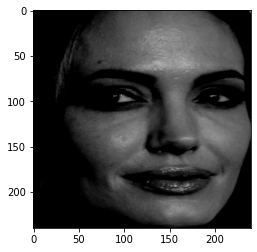

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


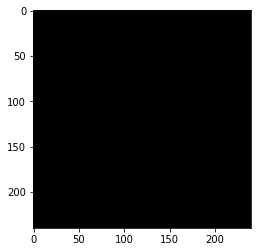

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


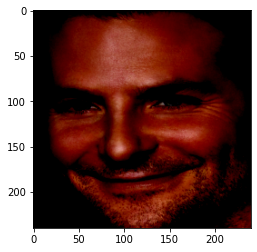

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


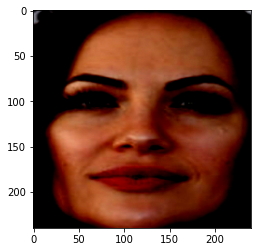

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


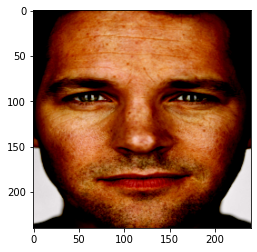

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


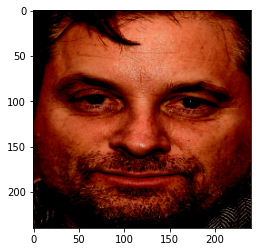

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


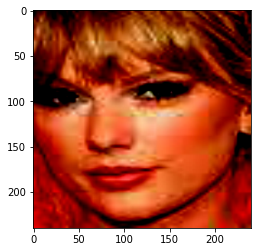

In [41]:
mtcnn = MTCNN(image_size=240, margin=0, min_face_size=20, keep_all=True) # initializing mtcnn for face detection
resnet = InceptionResnetV1(pretrained='vggface2').eval() # initializing resnet for face img to embeding conversion

dataset=datasets.ImageFolder('photos') # photos folder path 
idx_to_class = {i:c for c,i in dataset.class_to_idx.items()} # accessing names of peoples from folder names

def collate_fn(x):
    return x[0]

loader = DataLoader(dataset, collate_fn=collate_fn)

face_list = [] # list of cropped faces from photos folder
name_list = [] # list of names corrospoing to cropped photos
embedding_list = [] # list of embeding matrix after conversion from cropped faces to embedding matrix using resnet

for img, idx in loader:
    faces, prob = mtcnn(img, return_prob=True) 

    for face in faces:
        face1 = face.permute(1,2,0)
        plt.imshow(face1)
        plt.show()
        if face is not None and prob>0.90: # if face detected and porbability > 90%
            emb = resnet(face.unsqueeze(0)) # passing cropped face into resnet model to get embedding matrix
            embedding_list.append(emb.detach()) # resulten embedding matrix is stored in a list
            name_list.append(idx_to_class[idx]) # names are stored in a list

### Saving data into data.pt file

In [12]:
data = [embedding_list, name_list]
torch.save(data, 'data.pt') # saving data.pt file

### Matching face id of the given photo with available data from data.pt file

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


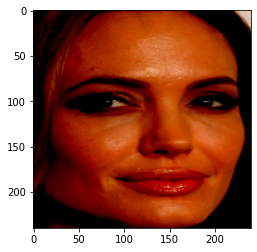

torch.Size([3, 240, 240])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


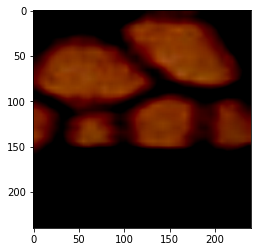

torch.Size([3, 240, 240])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


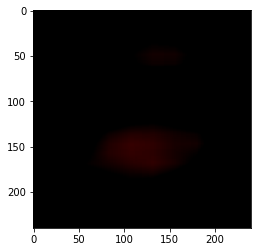

torch.Size([3, 240, 240])
(['angelina_jolie', 'taylor_swift', 'angelina_jolie'], [0.340603232383728, 1.2394860982894897, 1.3018741607666016])
Face matched with:  angelina_jolie With distance:  0.340603232383728


In [54]:

def face_match(img_path, data_path): # img_path= location of photo, data_path= location of data.pt 
    # getting embedding matrix of the given img
    img = Image.open(img_path)
    faces, prob = mtcnn(img, return_prob=True) # returns cropped face and probability
    
    saved_data = torch.load('data.pt') # loading data.pt file
    embedding_list = saved_data[0] # getting embedding data
    name_list = saved_data[1] # getting list of names
    
    verificated_idx = []
    min_dists = []
    
    for face in faces:
        face1 = face.permute(1,2,0)
        plt.imshow(face1)
        plt.show()

        print(face.shape)
        
        emb = resnet(face.unsqueeze(0)).detach() # detech is to make required gradient false

        dist_list = [] # list of matched distances, minimum distance is used to identify the person

        for idx, emb_db in enumerate(embedding_list):
            dist = torch.dist(emb, emb_db).item()
            dist_list.append(dist)

        idx_min = dist_list.index(min(dist_list))
        
        verificated_idx.append(name_list[idx_min])
        min_dists.append(min(dist_list))
        
    return (verificated_idx, min_dists)

result = face_match('1.jpg', 'data.pt')
print(result)
print('Face matched with: ',result[0][0], 'With distance: ',result[1][0])

In [ ]:
from PIL import Image, ImageDraw
from facenet_pytorch import MTCNN, extract_face
from IPython import display

mtcnn = MTCNN(image_size=240, margin=0, min_face_size=20, keep_all=True) # initializing mtcnn for face detection
resnet = InceptionResnetV1(pretrained='vggface2').eval() # initializing resnet for face img to embeding conversion

dataset=datasets.ImageFolder('photos') # photos folder path 
idx_to_class = {i:c for c,i in dataset.class_to_idx.items()} # accessing names of peoples from folder names

def collate_fn(x):
    return x[0]

loader = DataLoader(dataset, collate_fn=collate_fn)

face_list = [] # list of cropped faces from photos folder
name_list = [] # list of names corrospoing to cropped photos
embedding_list = [] # list of embeding matrix after conversion from cropped faces to embedding matrix using resnet
frames_tracked = []

img = Image.open('1.jpg')

boxes, probs, points = mtcnn.detect(img, landmarks=True)
print(boxes)
img_draw = img.copy()
draw = ImageDraw.Draw(img_draw)

for i, (box, point) in enumerate(zip(boxes, points)):
    print(type(box.tolist()))
    draw.rectangle(box.tolist(), outline=(255, 0, 0), width=6)
    for p in point:
        draw.rectangle((p - 10).tolist() + (p + 10).tolist(), width=10)
    frames_tracked.append(img_draw.resize((640, 360), Image.BILINEAR))
    
d = display.display(frames_tracked[0], display_id=True)
    
    

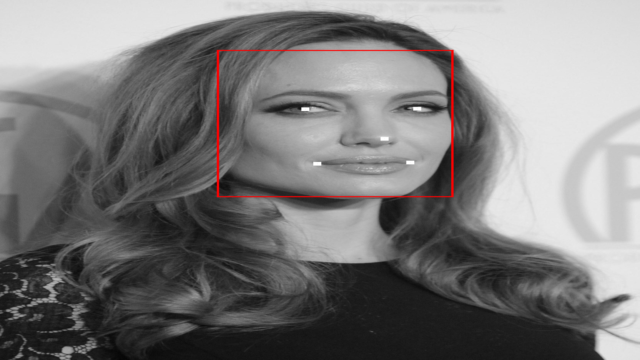

In [50]:
d.update(frames_tracked[1 % len(frames_tracked)])
d = display.display(frames_tracked[0], display_id=True)